# Optimizing US Market Strategy Through Detection of Counterfeit Hotspots and Insights
### Anayna Singh


In [95]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [97]:
# Load the data
file_path = 'fond-rouge_data.xlsx'

# Load the Excel file and get all sheets as a dictionary of dataframes
excel_data = pd.read_excel(file_path, sheet_name=None)  

# Convert each sheet into separate dataframes
sheet_names = list(excel_data.keys())  # Get the sheet names
df1 = excel_data[sheet_names[0]]  # First sheet as a dataframe
df2 = excel_data[sheet_names[1]]  # Second sheet as a dataframe
df3 = excel_data[sheet_names[2]]  # Third sheet as a dataframe


In [101]:
# Display the first dataframe 
print("First Sheet DataFrame:")
df1.head(2)

First Sheet DataFrame:


OrderID       Date  Country      City  \
0  order-9dd87a4c-7374-446a-845b-37fa211c121a   2019/2/8  Belgium  Brussels   
1  order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e  2019/3/10  Belgium  Brussels   

    Latitude  Longtitude ProductCategoryName  \
0  50.850346    4.351721             Brogues   
1  50.850346    4.351721             Brogues   

                                      ProductID   Product  Quantity  Discount  \
0  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d  François         7      3.96   
1  product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e     Denis         9      1.42   

   Price     Status  
0  41.45  COMPLETED  
1  58.95  COMPLETED

In [102]:
# Display the second dataframe
print("\nSecond Sheet DataFrame:")
df2.head(2)


Second Sheet DataFrame:


OrderID    Status
0  order-8cacb48a-6a1e-42de-abe2-cf6092a48af2  RETURNED
1  order-f696bafe-acd9-4985-a4ad-05da86cc8268  RETURNED

In [103]:
# Display the third dataframe
print("\nThird Sheet DataFrame:")
df3.head(2)


Third Sheet DataFrame:


Year_Month        Location_ID                                     ProductID  \
0     2018/2  Belgium, Brussels  product-20700833-fc84-4340-9a59-669fe6acc94b   
1     2018/2  Belgium, Brussels  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d   

    Product  Sentiment Class  
0   Antoine         90   POS  
1  François         92   POS

In [104]:
# Check df1 for missing values
df1.isna().sum()

OrderID                0
Date                   0
Country                0
City                   0
Latitude               0
Longtitude             0
ProductCategoryName    0
ProductID              0
Product                0
Quantity               0
Discount               0
Price                  0
Status                 0
dtype: int64

In [105]:
# Check df2 for missing values
df2.isna().sum()

OrderID    0
Status     0
dtype: int64

In [106]:
# Check df3 for missing values
df3.isna().sum()

Year_Month     0
Location_ID    0
ProductID      0
Product        0
Sentiment      0
Class          0
dtype: int64

In [107]:
# Merge df1 and df2 on 'OrderID'
merged_df = pd.merge(df1, df2, on='OrderID', how='left')

In [109]:
merged_df.head(2)

OrderID       Date  Country      City  \
0  order-9dd87a4c-7374-446a-845b-37fa211c121a   2019/2/8  Belgium  Brussels   
1  order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e  2019/3/10  Belgium  Brussels   

    Latitude  Longtitude ProductCategoryName  \
0  50.850346    4.351721             Brogues   
1  50.850346    4.351721             Brogues   

                                      ProductID   Product  Quantity  Discount  \
0  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d  François         7      3.96   
1  product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e     Denis         9      1.42   

   Price   Status_x Status_y  
0  41.45  COMPLETED      NaN  
1  58.95  COMPLETED      NaN

In [110]:
# Drop the 'Status_x' column from merged_df
merged_df = merged_df.drop(columns=['Status_x'])

In [111]:
# Rename 'Status_y' to 'Status'
merged_df = merged_df.rename(columns={'Status_y': 'Status'})

In [112]:
# Fill missing values in 'Status' with 'NOTRETURNED'
merged_df['Status'] = merged_df['Status'].fillna('NOTRETURNED')

In [113]:
# Extract 'Year' and 'Month' from 'Date' and create a new column 'Year_Month'
merged_df['Year_Month'] = merged_df['Date'].str.split('/').str[:2].str.join('/')

In [114]:
# Create a new column 'Location_ID' by concatenating 'Country' and 'City'
merged_df['Location_ID'] = merged_df['Country'] + ', ' + merged_df['City']

In [116]:
merged_df.head()

OrderID       Date  Country      City  \
0  order-9dd87a4c-7374-446a-845b-37fa211c121a   2019/2/8  Belgium  Brussels   
1  order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e  2019/3/10  Belgium  Brussels   
2  order-fd686823-060b-4d59-bd0a-512f87eb6654  2019/4/10  Belgium  Brussels   
3  order-6e3e2947-bf9c-4993-9215-307d1a61cf92  2019/5/24  Belgium  Brussels   
4  order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2  2019/6/22  Belgium  Brussels   

    Latitude  Longtitude ProductCategoryName  \
0  50.850346    4.351721             Brogues   
1  50.850346    4.351721             Brogues   
2  50.850346    4.351721               Flats   
3  50.850346    4.351721           Platforms   
4  50.850346    4.351721           Stilettos   

                                      ProductID   Product  Quantity  Discount  \
0  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d  François         7      3.96   
1  product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e     Denis         9      1.42   
2  product-0a97c64c-582b-41a9-b367-2a4e081cf3d5   Estelle         5      2.14   
3  product-642f72ba-c5d6-4126-be0f-a22fe4e9fbb6     Bella         8      4.55   
4  product-fa4a41fc-4a31-44b5-953f-8e2a45b43673    Cecile         4      3.92   

   Price       Status Year_Month        Location_ID  
0  41.45  NOTRETURNED     2019/2  Belgium, Brussels  
1  58.95  NOTRETURNED     2019/3  Belgium, Brussels  
2  45.61  NOTRETURNED     2019/4  Belgium, Brussels  
3  46.93  NOTRETURNED     2019/5  Belgium, Brussels  
4  78.56  NOTRETURNED     2019/6  Belgium, Brussels

In [117]:
# Merge the third dataframe (df3) with the merged_df on 'Location_ID', 'Year_Month', 'ProductID', and 'Product'
merged_df = pd.merge(merged_df, df3, on=['Location_ID', 'Year_Month', 'ProductID', 'Product'], how='left')

In [118]:
merged_df.head()

OrderID       Date  Country      City  \
0  order-9dd87a4c-7374-446a-845b-37fa211c121a   2019/2/8  Belgium  Brussels   
1  order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e  2019/3/10  Belgium  Brussels   
2  order-fd686823-060b-4d59-bd0a-512f87eb6654  2019/4/10  Belgium  Brussels   
3  order-6e3e2947-bf9c-4993-9215-307d1a61cf92  2019/5/24  Belgium  Brussels   
4  order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2  2019/6/22  Belgium  Brussels   

    Latitude  Longtitude ProductCategoryName  \
0  50.850346    4.351721             Brogues   
1  50.850346    4.351721             Brogues   
2  50.850346    4.351721               Flats   
3  50.850346    4.351721           Platforms   
4  50.850346    4.351721           Stilettos   

                                      ProductID   Product  Quantity  Discount  \
0  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d  François         7      3.96   
1  product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e     Denis         9      1.42   
2  product-0a97c64c-582b-41a9-b367-2a4e081cf3d5   Estelle         5      2.14   
3  product-642f72ba-c5d6-4126-be0f-a22fe4e9fbb6     Bella         8      4.55   
4  product-fa4a41fc-4a31-44b5-953f-8e2a45b43673    Cecile         4      3.92   

   Price       Status Year_Month        Location_ID  Sentiment Class  
0  41.45  NOTRETURNED     2019/2  Belgium, Brussels         84   NEU  
1  58.95  NOTRETURNED     2019/3  Belgium, Brussels         83   NEU  
2  45.61  NOTRETURNED     2019/4  Belgium, Brussels         86   POS  
3  46.93  NOTRETURNED     2019/5  Belgium, Brussels         84   NEU  
4  78.56  NOTRETURNED     2019/6  Belgium, Brussels         87   POS

In [119]:
# Check for missing values in the final merged dataframe
merged_df.isna().sum()

OrderID                0
Date                   0
Country                0
City                   0
Latitude               0
Longtitude             0
ProductCategoryName    0
ProductID              0
Product                0
Quantity               0
Discount               0
Price                  0
Status                 0
Year_Month             0
Location_ID            0
Sentiment              0
Class                  0
dtype: int64

In [121]:
# Display the columns of the final merged dataframe
merged_df.columns

Index(['OrderID', 'Date', 'Country', 'City', 'Latitude', 'Longtitude',
       'ProductCategoryName', 'ProductID', 'Product', 'Quantity', 'Discount',
       'Price', 'Status', 'Year_Month', 'Location_ID', 'Sentiment', 'Class'],
      dtype='object')

In [123]:
import pandas as pd

# Ensure the Discount does not exceed the Price
merged_df['Effective_Price'] = merged_df['Price'] - merged_df['Discount']
merged_df['Effective_Price'] = merged_df['Effective_Price'].clip(lower=0)  # Prevent negative prices

# Calculate Revenue
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Effective_Price']

# Calculate Refund
merged_df['Refund'] = 0.0  # Initialize Refund column with 0.0 (float)
returned_mask = merged_df['Status'] == 'RETURNED'  # Mask for rows with 'RETURNED' status
merged_df.loc[returned_mask, 'Refund'] = merged_df.loc[returned_mask, 'Quantity'] * (merged_df.loc[returned_mask, 'Price'] - merged_df.loc[returned_mask, 'Discount'])

# Ensure Refund column is of type float64
merged_df['Refund'] = merged_df['Refund'].astype('float64')


In [125]:
merged_df

OrderID       Date        Country  \
0     order-9dd87a4c-7374-446a-845b-37fa211c121a   2019/2/8        Belgium   
1     order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e  2019/3/10        Belgium   
2     order-fd686823-060b-4d59-bd0a-512f87eb6654  2019/4/10        Belgium   
3     order-6e3e2947-bf9c-4993-9215-307d1a61cf92  2019/5/24        Belgium   
4     order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2  2019/6/22        Belgium   
...                                          ...        ...            ...   
9445  order-94410d02-26e0-464c-8695-af1aff36e56d  2021/2/16  United States   
9446  order-09e912f8-793d-42a2-adaf-46f2c9fa392f   2021/2/1  United States   
9447  order-3b57ee4e-69f7-49ae-9b74-866dbd9f83b3  2021/2/16  United States   
9448  order-833e19fb-21f0-4850-a8b3-ea2a0ed42a5c  2021/2/12  United States   
9449  order-611059cb-4c66-4cc0-a4db-5ef722e0ace2   2021/2/9  United States   

           City   Latitude  Longtitude ProductCategoryName  \
0      Brussels  50.850346    4.351721             Brogues   
1      Brussels  50.850346    4.351721             Brogues   
2      Brussels  50.850346    4.351721               Flats   
3      Brussels  50.850346    4.351721           Platforms   
4      Brussels  50.850346    4.351721           Stilettos   
...         ...        ...         ...                 ...   
9445  San Diego  32.831200 -117.122500           Platforms   
9446  San Diego  32.831200 -117.122500           Platforms   
9447  San Diego  32.831200 -117.122500           Platforms   
9448  San Diego  32.831200 -117.122500             Brogues   
9449  San Diego  32.831200 -117.122500           Stilettos   

                                         ProductID    Product  Quantity  \
0     product-124ef52a-c7c3-48af-b315-33a14b2f6e1d   François         7   
1     product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e      Denis         9   
2     product-0a97c64c-582b-41a9-b367-2a4e081cf3d5    Estelle         5   
3     product-642f72ba-c5d6-4126-be0f-a22fe4e9fbb6      Bella         8   
4     product-fa4a41fc-4a31-44b5-953f-8e2a45b43673     Cecile         4   
...                                            ...        ...       ...   
9445  product-98f22154-ee97-4ef8-be84-7283cec0ebad  Bridgette         1   
9446  product-98f22154-ee97-4ef8-be84-7283cec0ebad  Bridgette         4   
9447  product-98f22154-ee97-4ef8-be84-7283cec0ebad  Bridgette         1   
9448  product-20700833-fc84-4340-9a59-669fe6acc94b    Antoine         2   
9449  product-7bef3e02-033c-4259-93da-a25f4f7169be  Claudette         4   

      Discount   Price       Status Year_Month               Location_ID  \
0         3.96   41.45  NOTRETURNED     2019/2         Belgium, Brussels   
1         1.42   58.95  NOTRETURNED     2019/3         Belgium, Brussels   
2         2.14   45.61  NOTRETURNED     2019/4         Belgium, Brussels   
3         4.55   46.93  NOTRETURNED     2019/5         Belgium, Brussels   
4         3.92   78.56  NOTRETURNED     2019/6         Belgium, Brussels   
...        ...     ...          ...        ...                       ...   
9445      0.58   39.95     RETURNED     2021/2  United States, San Diego   
9446      2.94   39.95     RETURNED     2021/2  United States, San Diego   
9447      1.59   39.95     RETURNED     2021/2  United States, San Diego   
9448      1.19   45.95     RETURNED     2021/2  United States, San Diego   
9449      8.46  102.95     RETURNED     2021/2  United States, San Diego   

      Sentiment Class  Effective_Price  Revenue  Refund  
0            84   NEU            37.49   262.43    0.00  
1            83   NEU            57.53   517.77    0.00  
2            86   POS            43.47   217.35    0.00  
3            84   NEU            42.38   339.04    0.00  
4            87   POS            74.64   298.56    0.00  
...         ...   ...              ...      ...     ...  
9445         45   NEG            39.37    39.37   39.37  
9446         45   NEG            37.01   148.04  148.04  
9447         45   NEG  

In [126]:
# Calculate total revenue and refund for each country
country_summary = merged_df.groupby("Country").agg(
    total_revenue=("Revenue", "sum"),
    total_refund=("Refund", "sum")
).reset_index()

In [127]:
country_summary

Country  total_revenue  total_refund
0          Austria      102313.78       4222.55
1          Belgium      130886.07       9260.13
2         Bulgaria       10739.86        305.04
3   Czech Republic       29283.12       2447.91
4          Denmark      168720.32       7760.60
5          Estonia       14694.21       1012.74
6          Finland       11134.02        334.25
7           France      535501.97      48480.91
8          Germany       12592.70       1143.36
9          Ireland       73171.89       3832.32
10           Italy      308939.57      25484.24
11     Netherlands      215995.26       9571.03
12          Poland       14126.41        281.28
13        Portugal       70873.87       5280.37
14         Romania       12854.42       1716.83
15           Spain      154474.55       5833.06
16          Sweden       13502.79        746.21
17     Switzerland       25012.31        354.40
18  United Kingdom      398535.08      46142.36
19   United States      371897.36      65580.20

C:\Users\anayn\AppData\Local\Temp\ipykernel_26108\3457499552.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



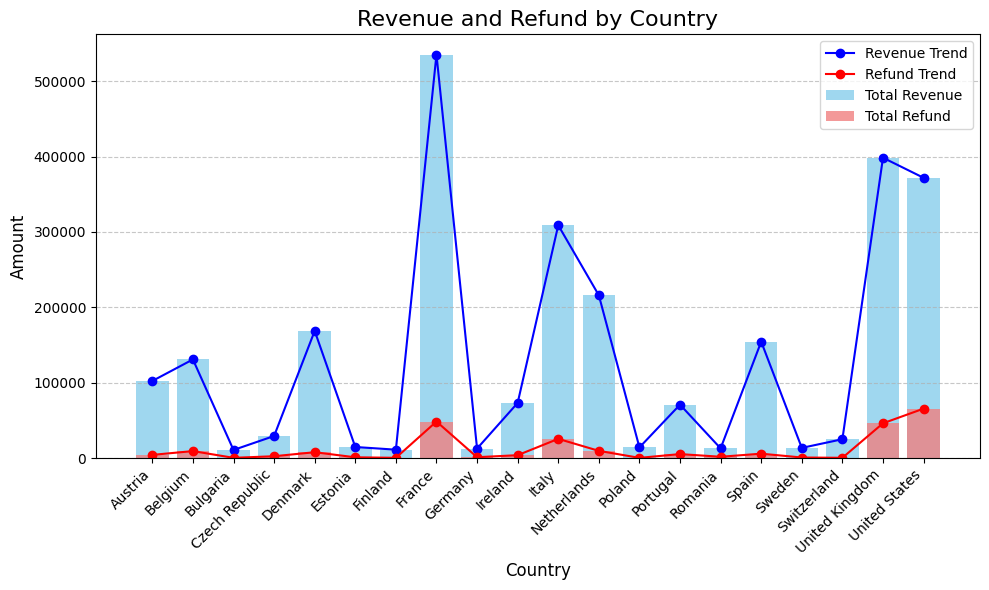

In [128]:
# Plot the data showing revenue and refund by country
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart for revenue and refund
x = country_summary["Country"]
ax.bar(x, country_summary["total_revenue"], label="Total Revenue", color="skyblue", alpha=0.8)
ax.bar(x, country_summary["total_refund"], label="Total Refund", color="lightcoral", alpha=0.8)

# Add line plots on top (optional, remove if you don't need lines)
ax.plot(x, country_summary["total_revenue"], label="Revenue Trend", color="blue", marker="o")
ax.plot(x, country_summary["total_refund"], label="Refund Trend", color="red", marker="o")

# Customize the plot
ax.set_title("Revenue and Refund by Country", fontsize=16)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Amount", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From the above graph we can observe that on a global level, there are three countries with high values of both revenues and returns: France, United States and United Kingdom. United States has the highest returns.

In [129]:
# Add Refund/Revenue ratio column
country_summary['Refund_to_Revenue_Ratio'] = country_summary['total_refund'] / country_summary['total_revenue']

# Handle cases where total_revenue is 0 to avoid division by zero
country_summary['Refund_to_Revenue_Ratio'] = country_summary['Refund_to_Revenue_Ratio'].fillna(0)

# Display the updated DataFrame
print(country_summary)

           Country  total_revenue  total_refund  Refund_to_Revenue_Ratio
0          Austria      102313.78       4222.55                 0.041271
1          Belgium      130886.07       9260.13                 0.070750
2         Bulgaria       10739.86        305.04                 0.028403
3   Czech Republic       29283.12       2447.91                 0.083595
4          Denmark      168720.32       7760.60                 0.045997
5          Estonia       14694.21       1012.74                 0.068921
6          Finland       11134.02        334.25                 0.030021
7           France      535501.97      48480.91                 0.090534
8          Germany       12592.70       1143.36                 0.090795
9          Ireland       73171.89       3832.32                 0.052374
10           Italy      308939.57      25484.24                 0.082489
11     Netherlands      215995.26       9571.03                 0.044311
12          Poland       14126.41        281.28    

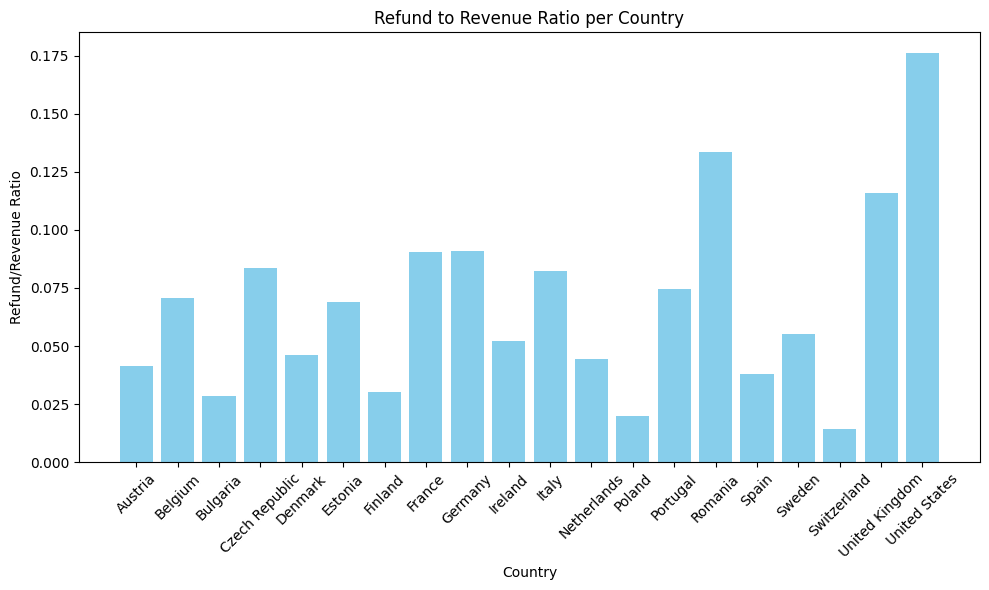

In [130]:
# Plot Refund/Revenue ratio per country
plt.figure(figsize=(10, 6))
plt.bar(country_summary['Country'], country_summary['Refund_to_Revenue_Ratio'], color='skyblue')
plt.title('Refund to Revenue Ratio per Country')
plt.xlabel('Country')
plt.ylabel('Refund/Revenue Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above graph, we can observe that the United States has the highest Refund/Revenue ratio. This indicates that a significant number of products are being returned, which can lead to substantial revenue losses.

In [132]:
us_city_summary

City  total_revenue  total_refund  avg_sentiment  \
0      Atlanta       74959.61       7214.74      87.435115   
1    Las Vegas       29098.73       1429.03      54.494845   
2  Los Angeles       42511.45       3179.03      55.026316   
3     New York      182051.49      30302.67      87.284389   
4    San Diego       43276.08      23454.73      44.215686   

   refund_revenue_ratio  
0              0.096248  
1              0.049110  
2              0.074781  
3              0.166451  
4              0.541979

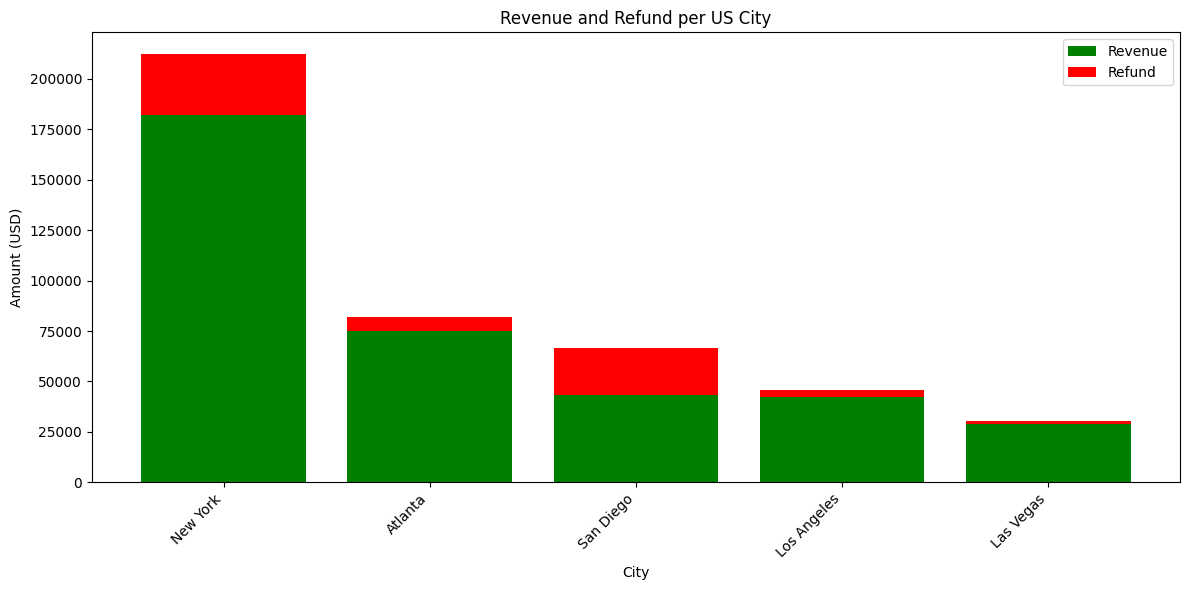

In [133]:
# Plotting Revenue and Refund per US City

# Filter for US cities
us_data = merged_df[merged_df['Country'] == 'United States']

# Group by city and calculate total revenue and refund
us_city_summary = us_data.groupby('City').agg(
    total_revenue=('Revenue', 'sum'),
    total_refund=('Refund', 'sum')
).reset_index()

# Sort data for better visualization (optional)
us_city_summary = us_city_summary.sort_values(by='total_revenue', ascending=False)

# Stacked Bar Chart
plt.figure(figsize=(12, 6))
bar_width = 0.8
x = np.arange(len(us_city_summary['City']))

# Plot revenue
plt.bar(x, us_city_summary['total_revenue'], width=bar_width, label='Revenue', color='green')

# Plot refund (stacked on top of revenue)
plt.bar(x, us_city_summary['total_refund'], width=bar_width, label='Refund', color='red', bottom=us_city_summary['total_revenue'])

# Add labels, title, and legend
plt.xticks(x, us_city_summary['City'], rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Amount (USD)')
plt.title('Revenue and Refund per US City')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


New York has a high amount of Revenue and Refund values whereas Los Angeles and Las Vegas have small amounts of Revenue and Refund Values.

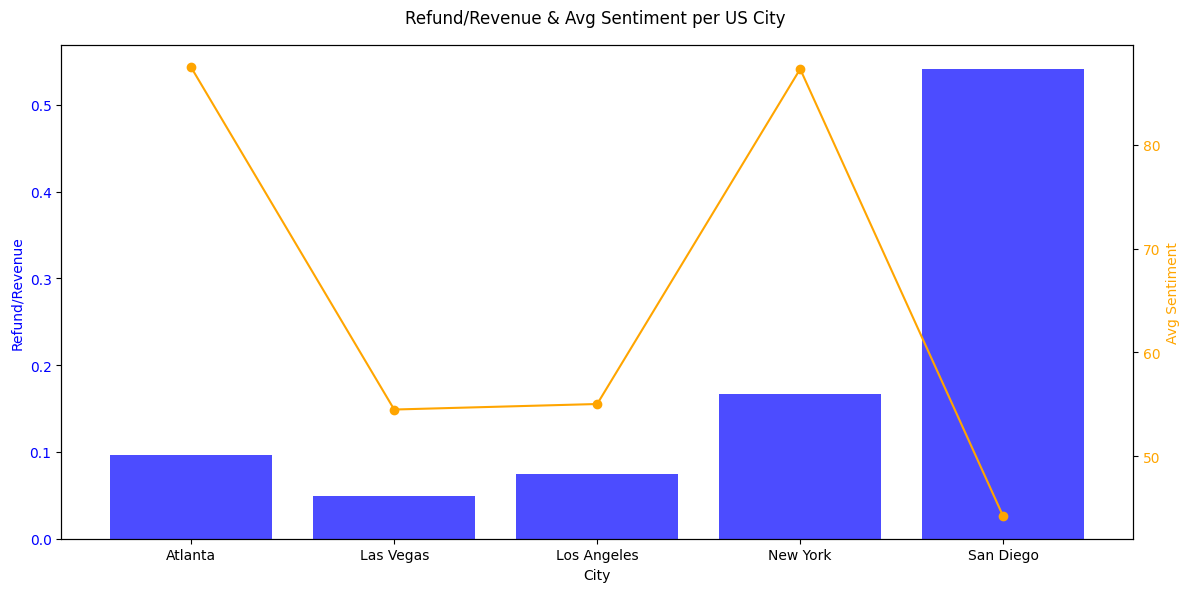

In [135]:
# Plotting Refund/Revenue & Avg Sentiment per US City
# Group by city for US data
us_city_summary = us_data.groupby('City').agg(
    total_revenue=('Revenue', 'sum'),
    total_refund=('Refund', 'sum'),
    avg_sentiment=('Sentiment', 'mean')  # Assuming 'Sentiment' is a column with sentiment values
).reset_index()

# Plot Column & Line
fig, ax1 = plt.subplots(figsize=(12, 6))

x = us_city_summary['City']
bar_width = 0.4

# Bar for Refund/Revenue
ax1.bar(x, us_city_summary['total_refund'] / us_city_summary['total_revenue'], 
        color='blue', alpha=0.7, label='Refund/Revenue')
ax1.set_ylabel('Refund/Revenue', color='blue')
ax1.set_xlabel('City')
ax1.tick_params(axis='y', labelcolor='blue')

# Line for Avg Sentiment
ax2 = ax1.twinx()
ax2.plot(x, us_city_summary['avg_sentiment'], color='orange', marker='o', label='Avg Sentiment')
ax2.set_ylabel('Avg Sentiment', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
fig.suptitle('Refund/Revenue & Avg Sentiment per US City')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()


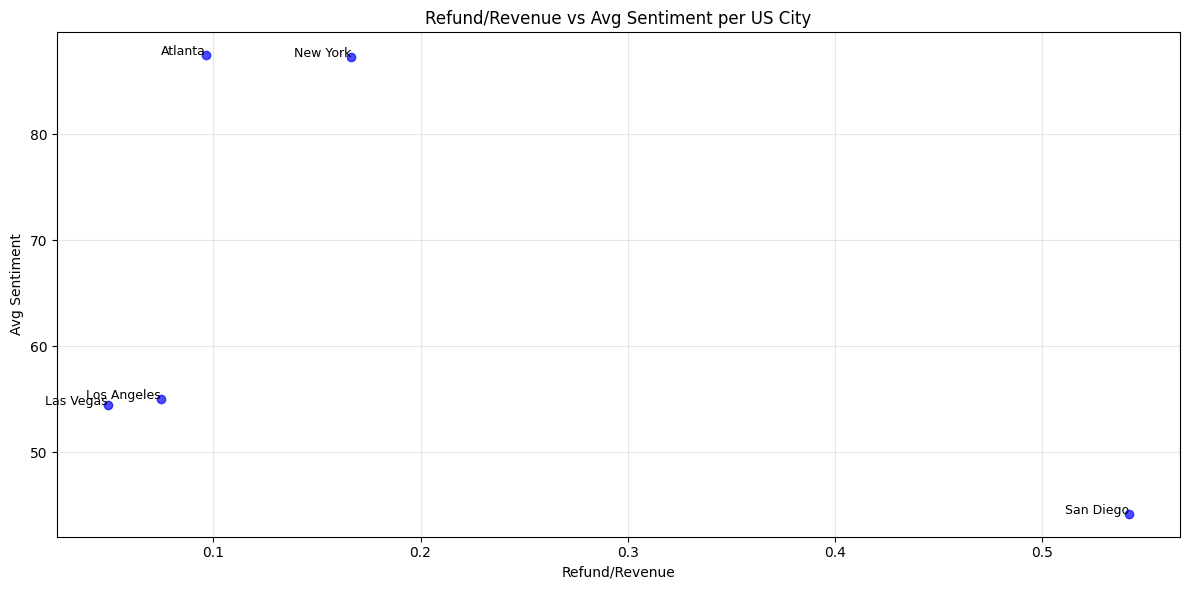

In [137]:
# Plotting Refund/Revenue vs Avg Sentiment per US City

# Ensure Refund/Revenue ratio is calculated
us_city_summary['refund_revenue_ratio'] = us_city_summary['total_refund'] / us_city_summary['total_revenue']

# Scatter plot: x-axis = Refund/Revenue, y-axis = Avg Sentiment
plt.figure(figsize=(12, 6))

# Scatter plot for Refund/Revenue and Avg Sentiment
plt.scatter(us_city_summary['refund_revenue_ratio'], 
            us_city_summary['avg_sentiment'], 
            color='blue', alpha=0.7)

# Add annotations for cities
for i, city in enumerate(us_city_summary['City']):
    plt.text(us_city_summary['refund_revenue_ratio'][i], 
             us_city_summary['avg_sentiment'][i], 
             city, fontsize=9, ha='right')

# Add title and labels
plt.title('Refund/Revenue vs Avg Sentiment per US City')
plt.xlabel('Refund/Revenue')
plt.ylabel('Avg Sentiment')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


From the above two graphs, we get very interesting conclusions. We can see that Los Angeles and Las Vegas have very low Refund/Revenue ratios. At the same time they have pretty low Average Sentiment values. This leads us to believe that these are the places where counterfeit goods are being sold in the US. Also, San Diego is a city where the Refund/Revenue is high but the Average Sentiment is low. This indicates that there are quality problems in the goods and customers aren't satisfied.

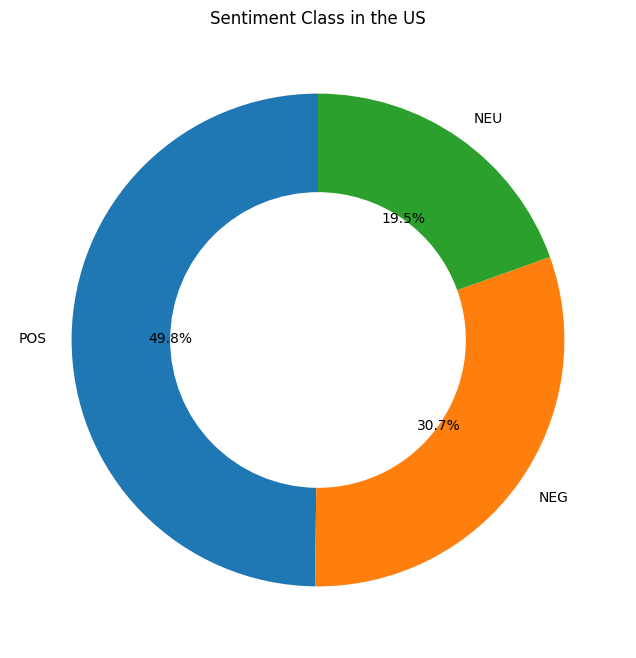

In [138]:
# Plotting Sentiment Class Distribution in the US
# Group sentiment classes for US
us_sentiment_summary = us_data['Class'].value_counts()

# Plot Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(us_sentiment_summary, labels=us_sentiment_summary.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Sentiment Class in the US')
plt.show()


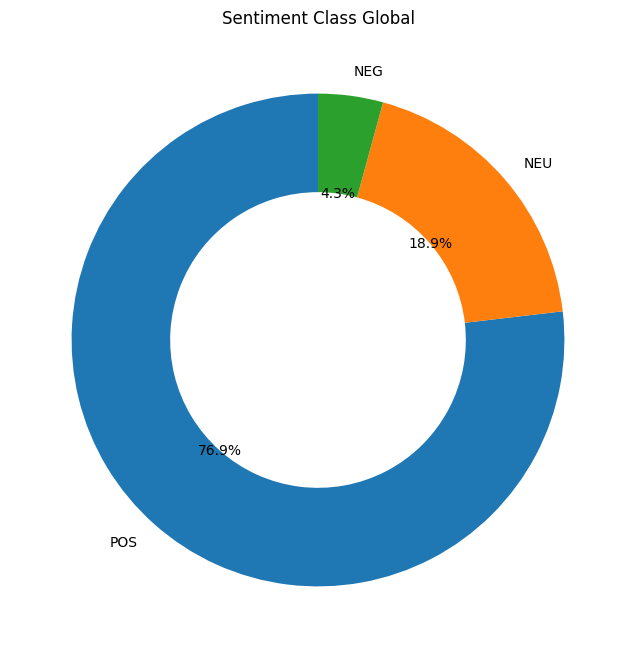

In [139]:
# Plotting Sentiment Class Distribution Globally
# Group sentiment classes globally
global_sentiment_summary = merged_df['Class'].value_counts()

# Plot Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(global_sentiment_summary, labels=global_sentiment_summary.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Sentiment Class Global')
plt.show()


From the above two graphs, we can observe that the negative sentiment in the US is significantly higher than the global level. This makes us wonder about what went wrong in the US.

C:\Users\anayn\AppData\Local\Temp\ipykernel_26108\917901380.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anayn\AppData\Local\Temp\ipykernel_26108\917901380.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



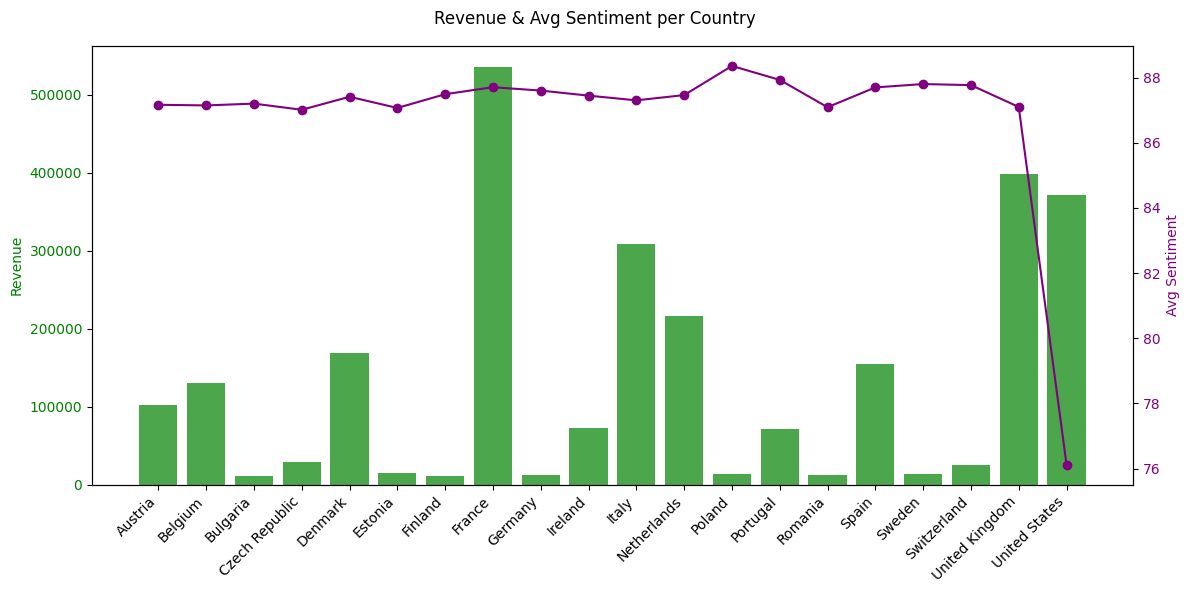

In [140]:
# Plotting Revenue & Avg Sentiment per Country
# Group by country
country_summary_2 = merged_df.groupby('Country').agg(
    total_revenue=('Revenue', 'sum'),
    avg_sentiment=('Sentiment', 'mean')
).reset_index()

# Plot Column & Line
fig, ax1 = plt.subplots(figsize=(12, 6))

x = country_summary_2['Country']

# Bar for Revenue
ax1.bar(x, country_summary_2['total_revenue'], color='green', alpha=0.7, label='Revenue')
ax1.set_ylabel('Revenue', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line for Avg Sentiment
ax2 = ax1.twinx()
ax2.plot(x, country_summary_2['avg_sentiment'], color='purple', marker='o', label='Avg Sentiment')
ax2.set_ylabel('Avg Sentiment', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Add title and legend
fig.suptitle('Revenue & Avg Sentiment per Country')
#plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()


C:\Users\anayn\AppData\Local\Temp\ipykernel_26108\3809046453.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\anayn\AppData\Local\Temp\ipykernel_26108\3809046453.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



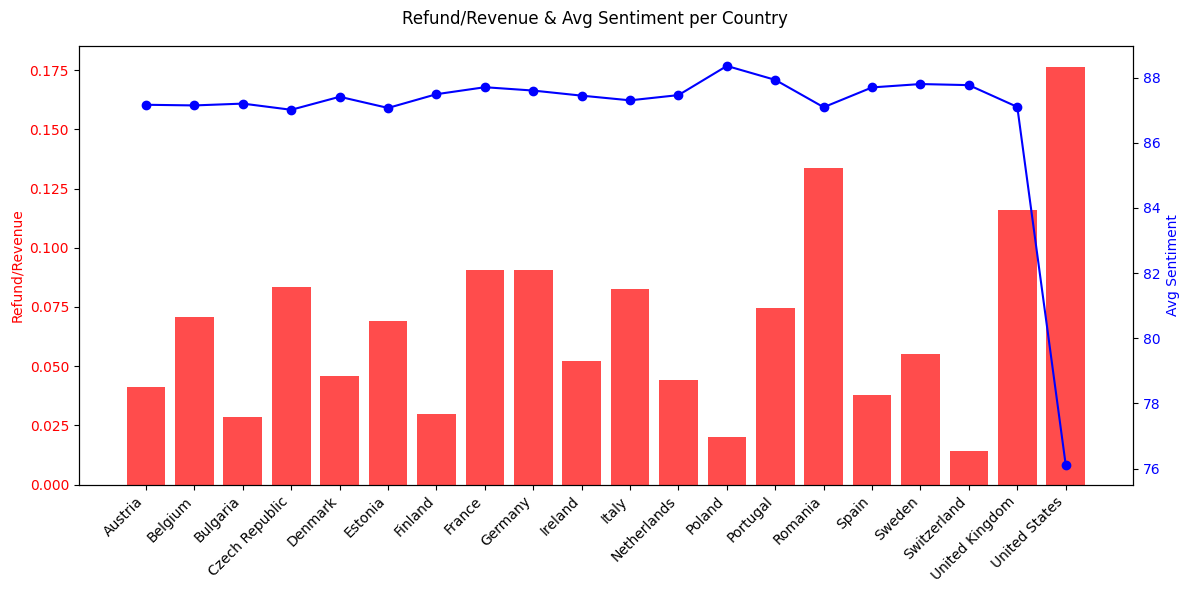

In [141]:
# Plotting Refund/Revenue & Avg Sentiment per Country
# Group by country
country_summary = merged_df.groupby('Country').agg(
    total_revenue=('Revenue', 'sum'),
    avg_sentiment=('Sentiment', 'mean'),
    total_refund=("Refund", "sum")
).reset_index()


# Add Refund/Revenue column
country_summary['refund_to_revenue'] = country_summary['total_refund'] / country_summary['total_revenue']

# Plot Column & Line
fig, ax1 = plt.subplots(figsize=(12, 6))

x = country_summary['Country']

# Bar for Refund/Revenue
ax1.bar(x, country_summary['refund_to_revenue'], color='red', alpha=0.7, label='Refund/Revenue')
ax1.set_ylabel('Refund/Revenue', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right' )

# Line for Avg Sentiment
ax2 = ax1.twinx()
ax2.plot(x, country_summary['avg_sentiment'], color='blue', marker='o', label='Avg Sentiment')
ax2.set_ylabel('Avg Sentiment', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right' )

# Add title and legend
fig.suptitle('Refund/Revenue & Avg Sentiment per Country')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()


Through the above two graphs, we again notice a significant drop in the sentiment values for US as compared to other countries. At the same time, US has high Refund/Revenue ratio meaning the products are performing poorly in the US market with people returning the products and leaving negative reviews about it.

In [142]:
# Plotting Geo Map with Multiple Layers for easy and quick visualization of different metrics
import plotly.express as px

# 1st Layer: Avg Sentiment as Bubble Color, Revenue as Bubble Size
fig1 = px.scatter_geo(
    merged_df,
    locations='Country',
    locationmode='country names',
    size='Revenue',
    color='Sentiment',
    hover_name='Country',
    hover_data={'Revenue': True, 'Sentiment': True},
    title='Global Map: Avg Sentiment (Color) and Revenue (Bubble Size)',
    size_max=20,
)
fig1.update_layout(
    legend_title=dict(text="Avg Sentiment (Color)"),
    geo=dict(showframe=False, showcoastlines=True),
)
fig1.show()

# 2nd Layer: Revenue as Bubble Color and Size
fig2 = px.scatter_geo(
    merged_df,
    locations='Country',
    locationmode='country names',
    size='Revenue',
    color='Revenue',
    hover_name='Country',
    hover_data={'Revenue': True},
    title='Global Map: Revenue Distribution (Color and Bubble Size)',
    size_max=20,
)
fig2.update_layout(
    legend_title=dict(text="Revenue (Color)"),
    geo=dict(showframe=False, showcoastlines=True),
)
fig2.show()

# 3rd Layer: Refunds as Bubble Color and Size
fig3 = px.scatter_geo(
    merged_df,
    locations='Country',
    locationmode='country names',
    size='Refund',
    color='Refund',
    hover_name='Country',
    hover_data={'Refund': True},
    title='Global Map: Refund Distribution (Color and Bubble Size)',
    size_max=20,
)
fig3.update_layout(
    legend_title=dict(text="Refunds (Color)"),
    geo=dict(showframe=False, showcoastlines=True),
)
fig3.show()

# 4th Layer: Avg Sentiment as Bubble Color and Size
fig4 = px.scatter_geo(
    merged_df,
    locations='Country',
    locationmode='country names',
    size='Sentiment',
    color='Sentiment',
    hover_name='Country',
    hover_data={'Sentiment': True},
    title='Global Map: Avg Sentiment Distribution (Color and Bubble Size)',
    size_max=20,
)
fig4.update_layout(
    legend_title=dict(text="Avg Sentiment (Color)"),
    geo=dict(showframe=False, showcoastlines=True),
)
fig4.show()

In [143]:
# Plotting Donut Charts for each country to show the percentage of returned vs not returned orders
# Aggregate data to calculate the count of 'RETURNED' and 'NOTRETURNED' by Country
status_summary = merged_df.groupby(['Country', 'Status']).size().reset_index(name='Count')

# Loop through each country and plot a donut chart
countries = status_summary['Country'].unique()
for country in countries:
    # Filter data for the current country
    country_data = status_summary[status_summary['Country'] == country]
    
    # Create a donut chart
    fig = px.pie(country_data, 
                 values='Count', 
                 names='Status', 
                 title=f'Returned vs Not Returned Percentages for {country}',
                 hole=0.4)  # hole=0.4 makes it a donut chart
    
    # Add a legend for better interpretation
    fig.update_layout(showlegend=True, legend_title="Order Status")
    
    # Show the plot
    fig.show()


Within the United States, Fond Rouge faces challenges in specific locations. The East Coast shows positive sentiment scores and higher sales. However, Los Angeles and Las Vegas are significantly affected by counterfeit goods. 

The issues in the US are not limited to counterfeiting. There are two distinct problems:
1. Counterfeiting: Locations like Los Angeles and Las Vegas exhibit low sentiment and low refunds.
2. Quality Issues: Locations such as San Diego show high refunds and low sentiment, indicating potential quality problems.